## Zadanie 1 (5b)

V tomto zadaní budete pracovať s datasetom Heart Failure Clinical Records, ktorý obsahuje záznamy pacientov so zlyhaním srdca, zozbierané počas obdobia ich sledovania.

Dataset je dostupný online: https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records

Na stránke nájdete aj doplňujúce informácie o premenných, ktoré dataset obsahuje. (Odporúčam prečítať :) )

**Body dostanete za odpovede na zvýraznené otázky**


### Úloha 1 (1b)

Načítajte dataset do premennej `data_hf`.

In [3]:
import pandas as pd

data_hf = pd.read_csv('heart+failure+clinical+records.zip')
print(data_hf.duplicated().any())

False


   **Obsahuje dataset chýbajúce hodnoty (NA) ?**

**Aký typ majú vybrané premenné v datasete ? (numerické/kategorické)** (Ak by ste si pri niektorých premenných neboli istí, zdôvodnite svoju odpoveď.)

- age
- anaemia 
- high_blood_pressure
- serum_sodium
- death_event

**Obsahuje dataset duplicitné záznamy?**

### Úloha 2 (1b)

Skúmajte premennú pohlavie ('sex'). Premenná je kódovaná hodnotami 0 a 1. ( 0 = žena, 1 = muž)

In [4]:
print(data_hf['sex'].value_counts())
print(data_hf['smoking'].value_counts())
#pd.crosstab(data_hf['sex'], data_hf['smoking'])
data_hf.groupby('sex')['smoking'].value_counts()

sex
1    194
0    105
Name: count, dtype: int64
smoking
0    203
1     96
Name: count, dtype: int64


sex  smoking
0    0          101
     1            4
1    0          102
     1           92
Name: count, dtype: int64

**Koľko záznamov mužov a žien obsahuje dataset?**

**Koľko mužov a žien je nefajčiarov ? (0 = nefajčiar, 1 = fajčiar)**

### Úloha 3 (1b)

Popíšte premennú vek ('age').

In [5]:
data_hf['age'].describe()
data_hf['age'].value_counts()

age
60.000    33
50.000    27
65.000    26
70.000    25
45.000    19
55.000    17
75.000    11
58.000    10
53.000    10
63.000     8
80.000     7
72.000     7
42.000     7
40.000     7
85.000     6
68.000     5
62.000     5
52.000     5
61.000     4
49.000     4
73.000     4
51.000     4
59.000     4
69.000     3
46.000     3
82.000     3
90.000     3
64.000     3
48.000     2
78.000     2
95.000     2
57.000     2
54.000     2
77.000     2
67.000     2
66.000     2
44.000     2
60.667     2
87.000     1
79.000     1
41.000     1
94.000     1
86.000     1
81.000     1
43.000     1
47.000     1
56.000     1
Name: count, dtype: int64

**Aký je minimálny, maximálny a priemerný vek pacientov v datasete?**

**Z akého veku je v datasete najviac záznamov?**

### Úloha 4 (1b)

Pridajte do datasetu novú premennú s názvom `risk`, ktorá bude predstavovať riziko úmrtia pacienta po zlyhaní srdca. Táto premenná bude kategorická a bude obsahovať hodnoty 'Low' a 'High'. 
Premennú vytvorte na základe if-else rozhodovania podľa premenných 'age' a 'serum_creatinine':

- Ak je vek pacienta väčší ako 50 a zároveň level kreatinínu v krvnom sére ('serum_creatinine') je väčší ako 1.2 mg/dL, tak hodnota premennej 'Risk' je 'High'.
- V opačnom prípade je hodnota 'Low'

Hint: môžete použiť metódu `apply` na vytvorenie novej premennej, v ktorej použijete lambda funkciu na definovanie podmienok.

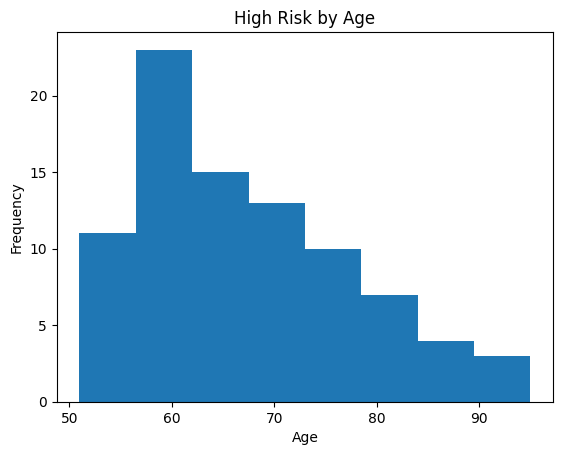

In [6]:
import matplotlib.pyplot as plt
# Add the 'risk' variable
data_hw = pd.read_csv('heart+failure+clinical+records.zip')
data_hw['risk'] = data_hw.apply(lambda row: 'High' if row['age'] > 50 and row['serum_creatinine'] > 1.2 else 'Low', axis=1)

# Visualize high risk by age


high_risk = data_hw[data_hw['risk'] == 'High']
plt.hist(high_risk['age'], bins='auto')
plt.title('High Risk by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Vizualizujte vysoké riziko úmrtia pre jednotlivé vekové skupiny histogramom:

Hint: Použite metódu `hist` z knižnice `matplotlib.pyplot` na vizualizáciu distribúcie veku pre pacientov s vysokým rizikom úmrtia.

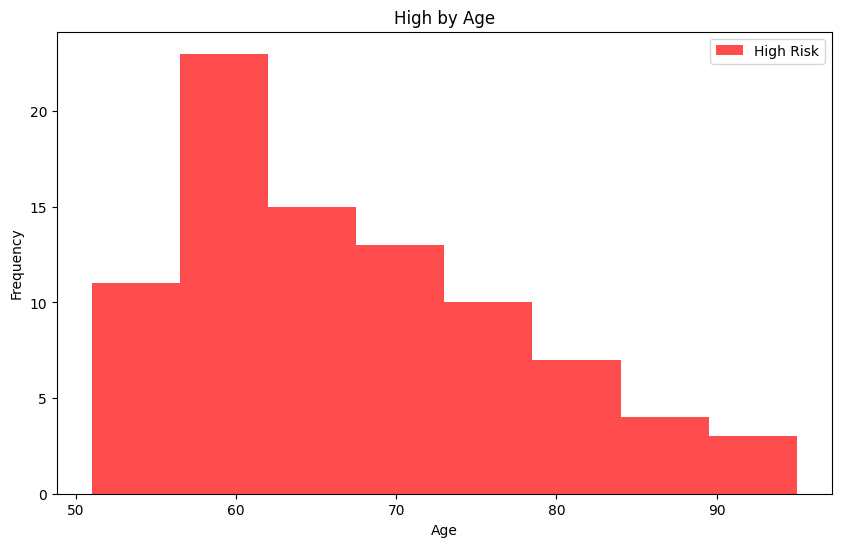

In [7]:
plt.figure(figsize=(10, 6))

# Plot for high risk
plt.hist(data_hw[data_hw['risk'] == 'High']['age'], bins='auto', alpha=0.7, label='High Risk', color='red')

plt.title('High by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.legend()
plt.show()

In [8]:
# TODO

**V akom veku je riziko zlyhania srdca najväčšie?**

60

In [12]:
age_risk_counts = data_hw[data_hw['risk'] == 'High'].groupby('age').size()

max_risk_age = age_risk_counts.idxmax()
max_risk_count = age_risk_counts.max()

print(f"The age with highest risk of hrt atck is {max_risk_age} with {max_risk_count} patients")

The age with highest risk of hrt atck is 60.0 with 18 patients


**Koľko záznamov (približne) je v datasete v tejto vekovej kategórii?**

### Úloha 5 (1b)

Analyzujte koreláciu medzi všetkými atribútmi tohto datasetu (napr. vytvorením correlation plot)

Hint: Nenumerické atribúty môžete pred vytvorením korelačnej matice odstrániť.


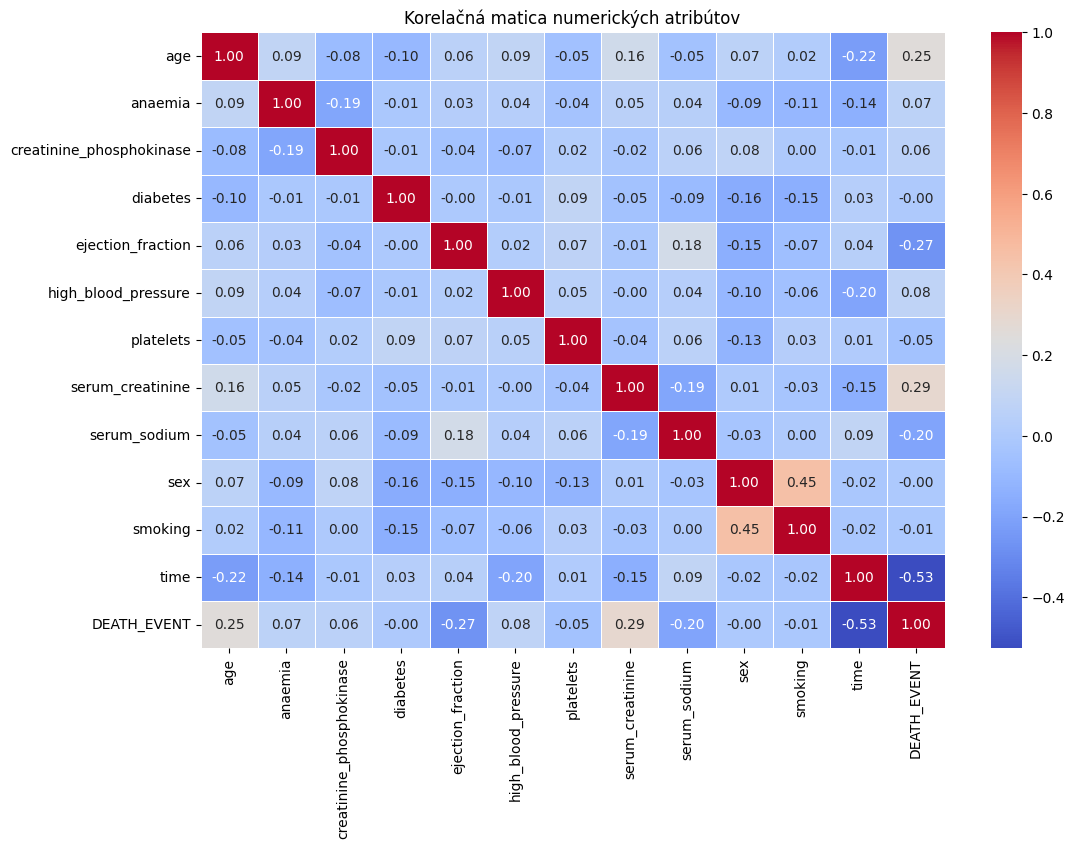

In [10]:
import seaborn as sns

data_hw2 = pd.read_csv('heart+failure+clinical+records.zip')

cor_mat = data_hw2.corr()

# Vytvorenie korelačného plotu (heatmapy)
plt.figure(figsize=(12, 8))
sns.heatmap(cor_mat, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Nastavenie názvu grafu
plt.title('Korelačná matica numerických atribútov')
plt.show()



**Ktoré atribúty majú medzi sebou najväčšiu zápornú koreláciu?** (uveďte prvé dve dvojice)

**Ktoré atribúty majú medzi sebou najväčšiu kladnú koreláciu?** (uveďte prvú dvojicu)

----

Viac informácií o zlyhaní srdca: https://www.nhlbi.nih.gov/health/heart-failure